<a href="https://colab.research.google.com/github/mksv9871234/Indian-unicorn-startups-2023-analysis.github.io/blob/main/Indian_Unicorn_Analysis%26Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display , HTML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
display(HTML(''' <h1 style="background-color:green;color:white;padding:50px 30px;font-size:40px;margin:10px 50px;text-align:center;">Indian Unicorn Startups 2023 Complete Analysis & Insights</h1> '''))

<h2>Introduction</h2>
<p>
India has witnessed a massive boom in the startup ecosystem over the past few years. As of 2023, India is the third-largest home to unicorn startups — privately held companies valued at over $1 billion.

In this notebook, we will analyze the latest updated data of Indian unicorns, exploring patterns across sectors, funding, valuations, locations, and founders. This project aims to reveal insights that are useful for entrepreneurs, investors, analysts, and students of business and data science.
</p>

<h2>Goals of This Analysis</h2>

- Understand the **growth trend** of unicorns over the years.
- Find out the **top sectors** producing unicorns.
- Analyze **city-wise** and **state-wise** unicorn distribution.
- Evaluate **valuation ranges** and investor involvement.
- Measure the **average time to become a unicorn**.
- Derive key **business insights and improvement points**.


Let's Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mlvprasad/indian-unicorn-startups-2023-june-updated

Dataset URL: https://www.kaggle.com/datasets/mlvprasad/indian-unicorn-startups-2023-june-updated
License(s): apache-2.0
  0% 0.00/4.53k [00:00<?, ?B/s]
100% 4.53k/4.53k [00:00<00:00, 9.01MB/s]


In [ ]:
!unzip indian-unicorn-startups-2023-june-updated.zip -d data/

Archive:  indian-unicorn-startups-2023-june-updated.zip
  inflating: data/Indian Unicorn startups 2023 updated.csv  


In [ ]:
df = pd.read_csv('/content/data/Indian Unicorn startups 2023 updated.csv')

<h2>Dataset Overview</h2>

Let’s first explore what columns are present in the dataset and what kind of data we’re dealing with.


In [ ]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


In [ ]:
df.tail()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
97,98,Purplle,E-Commerce - Personal Care & Cosmetics,1.10,1.10,Jun/2022,Mumbai,"JSW Ventures, IvyCap Ventures, Blume Ventures,..."
98,99,Leadsquared,SaaS - CRM,1.00,1.00,Jun/2022,Bangalore,"Stakeboat Capital, Gaja Capital, WestBridge"
99,100,OneCard,Fintech - Credit Cards,1.30,1.30,Jul/2022,Pune,"QED Investors, Matrix Partners India, Sequoia ..."
100,101,Shiprocket,Aggregator - Logistics Services,1.23,1.23,Aug/2022,Delhi,"Lightrock India, Info Edge, Tribe Capital, Tem..."
101,102,Molbio Diagnostics,Healthtech - Diagnostics,1.53,1.53,Sep/2022,Goa,"Temasek, Motilal Oswal"


In [ ]:
df.shape

(102, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


<h2>Clean the Data</h2>
convert Entry column to datetime <br>
Missing values (NaN) <br>
fixing coumn names if needed <br>
removing duplicate rows <br>
remove commas,crores, etc. from Amount <br>


1. convert Entry column to datetime

In [ ]:
df['Entry']= pd.to_datetime(df['Entry'])

/tmp/ipython-input-32-2610635670.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Entry']= pd.to_datetime(df['Entry'])


2. Missing values

In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


there is 0 missing value in all columns even though we have to do this

In [ ]:
df.replace(['Unknown','NaN','nan','none','NULL','null' ],np.nan,inplace=True)

In the dataset, missing values may be represented as strings like 'unknown', 'NaN', 'nan', 'none', or similar. However, the isnull() function in Pandas does not recognize these string values as actual NaN.

Therefore, we first need to replace all such string indicators with proper np.nan values, so that functions like isnull() or fillna() can detect and handle them correctly.

In [ ]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


really we don't have missing values

3. Fixing column names

In [ ]:
df.rename(columns={'Entry Valuation^^ ($B)': 'Entry Valuation($B)'}, inplace=True)

4. Removing dublicates

In [ ]:
df = df.drop_duplicates()


In [ ]:
display(HTML(''' <h1 style="background-color:green;color:white;padding:50px 30px;font-size:40px;margin:10px 50px;text-align:center;">Analysis & Insights of Data</h1> '''))

<h2>Most funded sectors</h2>






In [ ]:
df.head(2)

,No.,Company,Sector,Entry Valuation($B),Valuation ($B),Entry,Location,Select Investors,Entry Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012


In [ ]:
total_funding_per_sector = df.groupby('Sector')['Valuation ($B)'].sum().sort_values(ascending=False)

print("Total Amount Funded per Sector:")
display(total_funding_per_sector)

Total Amount Funded per Sector:


,Valuation ($B)
Sector,
E-Commerce,44.1
Edtech,28.6
Foodtech,16.1
Fintech - Payments & Wallet,16.0
Fintech - Payments,14.8
...,...
Fintech - Marketplace - SME Lending,1.0
Proptech - Classifieds,1.0
SaaS - HR,1.0


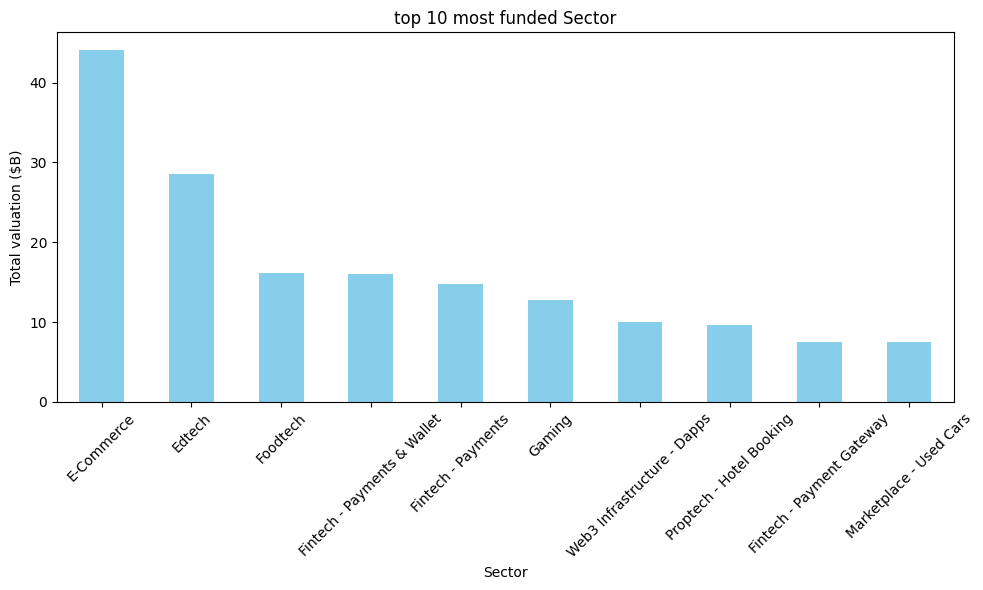

In [ ]:
total_funding_per_sector.head(10).plot(kind='bar',figsize=(10,6), color='skyblue')
plt.title('top 10 most funded Sector')
plt.xlabel('Sector')
plt.ylabel('Total valuation ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Among all sectors, E-commerce stands out as the most funded sector, followed by EdTech, FoodTech, and FinTech (Payments & Wallets). These sectors have attracted the highest investor interest, reflecting strong growth potential and market demand.

If you want a slightly more concise version:

E-commerce leads as the most funded sector, followed by EdTech, FoodTech, and FinTech (Payments & Wallets), indicating high investor confidence and growth potential in these industries.

<h2>Top Startup Hubs (Locations)</h2>

In [ ]:
top_hubs = df.groupby('Location')['Valuation ($B)'].sum().sort_values(ascending=False)
display(top_hubs)

,Valuation ($B)
Location,
Bangalore,134.800
Bangalore/Singapore,40.600
Gurgaon,37.938
Mumbai,32.100
Noida,25.100
Delhi,15.530
Bangalore/San Francisco,8.300
Pune,5.600
Pune/Bellevue,5.000


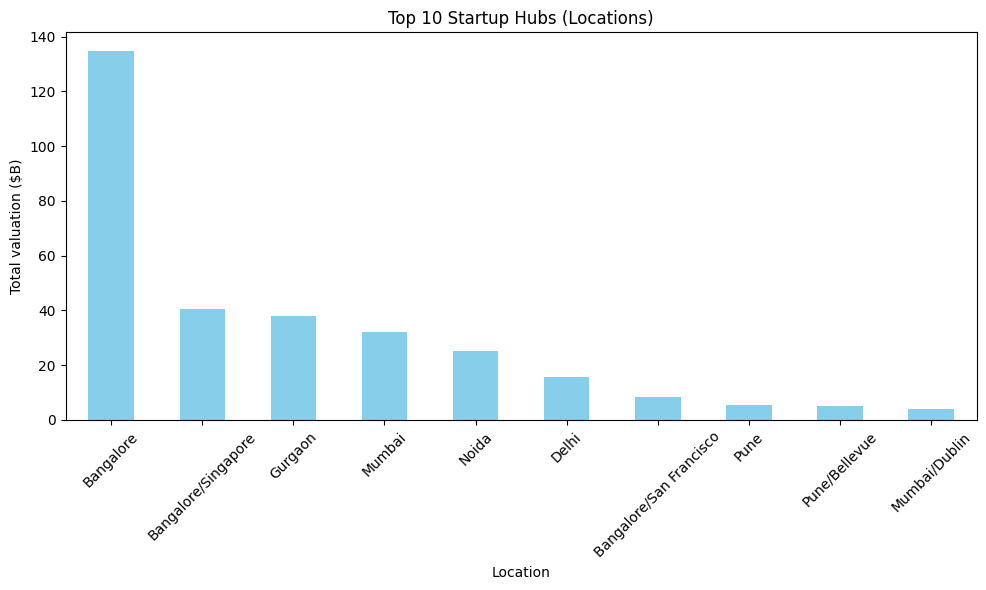

In [ ]:
top_hubs.head(10).plot(kind='bar',figsize=(10,6), color='skyblue')
plt.title('Top 10 Startup Hubs (Locations)')
plt.xlabel('Location')
plt.ylabel('Total valuation ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bengaluru emerges as India’s leading startup hub, home to a large number of startups and several high-valuation unicorns. The city’s vibrant tech ecosystem and strong investor network have made it the top destination for innovation and funding. Following Bengaluru, cities like Gurgaon, Mumbai, Noida, and Delhi also show significant startup activity with valuations that are approximately similar, highlighting their growing importance in the Indian startup landscape.

<h2>Top 10 Funded compnies</h2>

In [ ]:
top_10_funded = df.groupby('Company')['Valuation ($B)'].sum().sort_values(ascending=False)
display(top_10_funded)

,Valuation ($B)
Company,
Flipkart^,37.600
BYJUS,22.000
PayTM^,16.000
PhonePe^,12.000
Swiggy,10.700
...,...
Leadsquared,1.000
Slice,1.000
Hasura,1.000


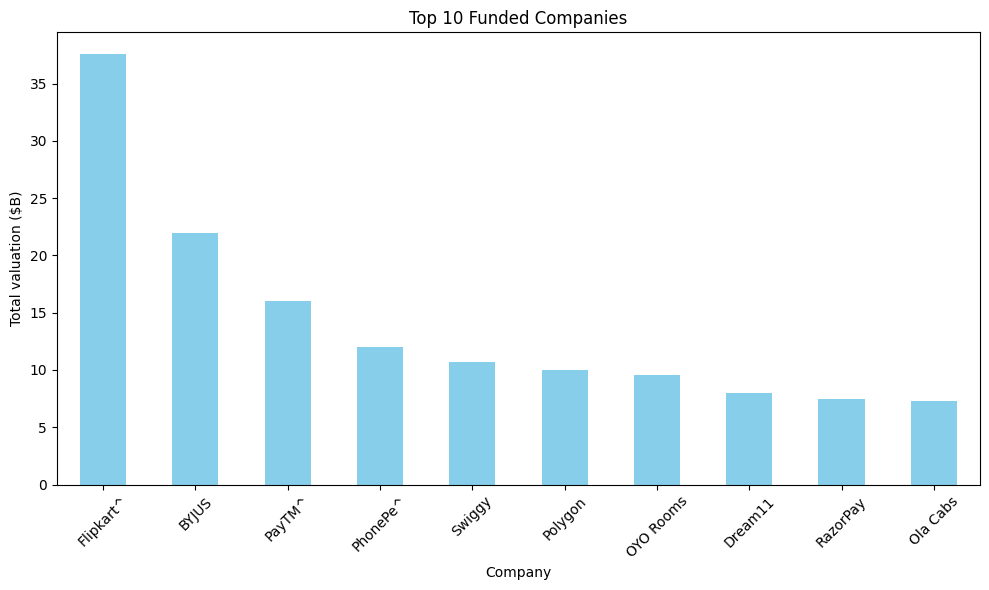

In [ ]:
top_10_funded.head(10).plot(kind='bar',figsize=(10,6), color='skyblue')
plt.title('Top 10 Funded Companies')
plt.xlabel('Company')
plt.ylabel('Total valuation ($B)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

By analyzing this chart, we observe that the E-commerce sector, led by Flipkart, holds the highest total funding and valuation. Following that, the EdTech sector is represented strongly by BYJU'S, while the FinTech and Payments sector sees major contributions from companies like Paytm and PhonePe. These companies are among the top valuation leaders in their respective domains.

<h2>Entry Valuation vs Final Valuation</h2>

In [ ]:
df.head(2)

,No.,Company,Sector,Entry Valuation($B),Valuation ($B),Entry,Location,Select Investors,Entry Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,2011-09-01,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011
1,2,Flipkart^,E-Commerce,1.0,37.6,2012-02-01,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012


<Figure size 1400x800 with 0 Axes>

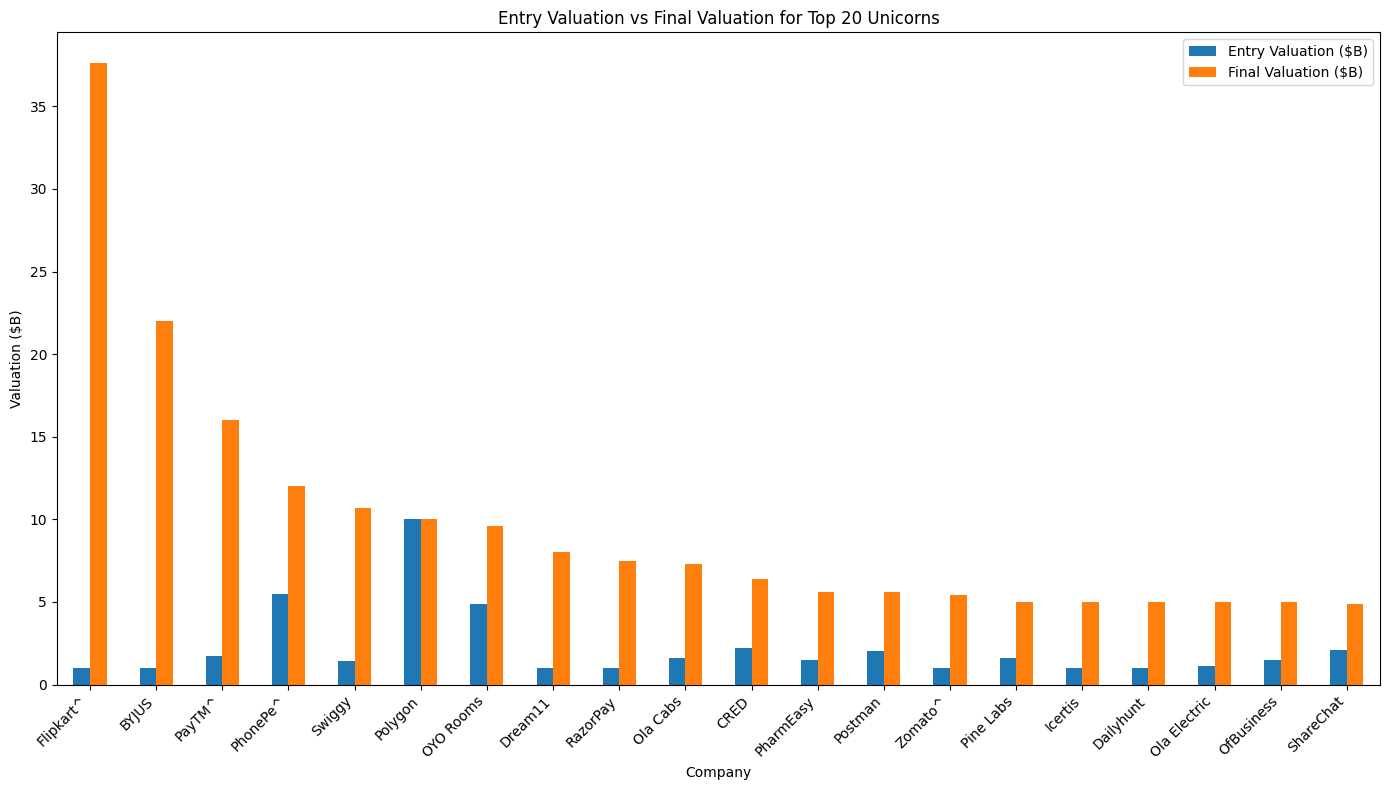

In [ ]:

valuation_comparison = df[['Company', 'Entry Valuation($B)', 'Valuation ($B)']].sort_values(by='Valuation ($B)', ascending=False).head(20)

plt.figure(figsize=(14, 8))
valuation_comparison.set_index('Company').plot(kind='bar', figsize=(14, 8))
plt.title('Entry Valuation vs Final Valuation for Top 20 Unicorns')
plt.xlabel('Company')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Entry Valuation ($B)', 'Final Valuation ($B)'])
plt.tight_layout()
plt.show()

By analyzing this chart, we observe that Flipkart stands out as one of the most powerful companies in the E-commerce sector. Starting with a relatively small initial fund, it has grown to surpass a valuation of $37 billion. Following closely is BYJU'S from the EdTech sector, which also scaled from modest funding to exceed a $22 billion valuation. In the FinTech and Payments space, Paytm and PhonePe have also emerged as leading players, demonstrating impressive growth in valuation and market influence.

<Figure size 1400x800 with 0 Axes>

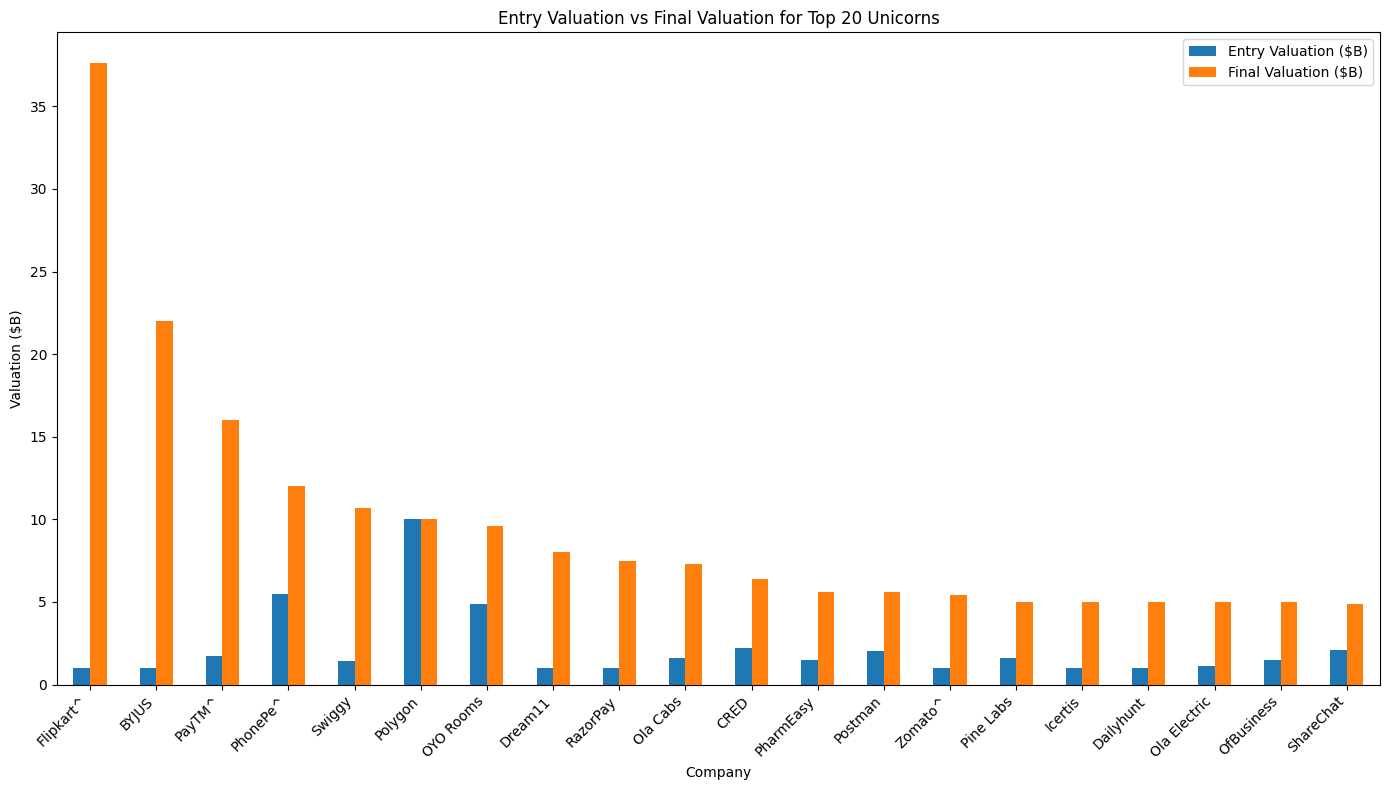

In [ ]:
valuation_comparison = df[['Company', 'Entry Valuation($B)', 'Valuation ($B)']].sort_values(by='Valuation ($B)', ascending=False).head(20)

plt.figure(figsize=(14, 8))
valuation_comparison.set_index('Company').plot(kind='bar', figsize=(14, 8))
plt.title('Entry Valuation vs Final Valuation for Top 20 Unicorns')
plt.xlabel('Company')
plt.ylabel('Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Entry Valuation ($B)', 'Final Valuation ($B)'])
plt.tight_layout()
plt.show()

<h2>became Most Fastest valuable companies</h2>

In [ ]:
df['Time to Valuation'] = (pd.to_datetime('2023-06-01') - df['Entry']).dt.days / 365.25

# Sort by 'Time to Valuation' in ascending order and select the top 20
fastest_unicorns = df.sort_values(by='Time to Valuation', ascending=True).head(20)

print("Top 20 Companies that Became Most Valuable Fastest:")
display(fastest_unicorns[['Company', 'Sector', 'Valuation ($B)', 'Entry','Location', 'Time to Valuation']])

Top 20 Companies that Became Most Valuable Fastest:


,Company,Sector,Valuation ($B),Entry,Location,Time to Valuation
101,Molbio Diagnostics,Healthtech - Diagnostics,1.53,2022-09-01,Goa,0.747433
100,Shiprocket,Aggregator - Logistics Services,1.23,2022-08-01,Delhi,0.832307
99,OneCard,Fintech - Credit Cards,1.30,2022-07-01,Pune,0.917180
96,PhysicsWallah,Edtech,1.10,2022-06-01,Noida,0.999316
98,Leadsquared,SaaS - CRM,1.00,2022-06-01,Bangalore,0.999316
97,Purplle,E-Commerce - Personal Care & Cosmetics,1.10,2022-06-01,Mumbai,0.999316
95,Open Financial Technologies,Fintech - Neo Bank,1.00,2022-05-01,Bangalore,1.084189
92,Amagi Media Labs,SaaS - Local Ads Targeting,1.00,2022-03-01,Bangalore,1.251198
91,CredAvenue,Marketplace - Lending,1.30,2022-03-01,Chennai,1.251198
93,Oxyzo Financial Services,Fintech - Marketplace - SME Lending,1.00,2022-03-01,Gurgaon,1.251198


By analyzing this table, we observe that the fastest company to reach unicorn status is Molbio Diagnostics, which achieved a billion-dollar valuation in just 9 months. In total, these 20 companies became unicorns within a year of their founding, showcasing rapid growth and strong investor confidence.

<h2>Investor Activity</h2>

In [ ]:
# Split the 'Select Investors' string by comma and create a list of investors for each row
investors_list = df['Select Investors'].str.split(',')

# Flatten the list of lists into a single list of all investors, stripping leading/trailing whitespace
all_investors = [investor.strip() for sublist in investors_list for investor in sublist]

# Count the frequency of each investor
investor_counts = pd.Series(all_investors).value_counts()

print("Frequency of each investor:")
display(investor_counts)

Frequency of each investor:


,count
Tiger Global,38
Sequoia Capital India,25
SoftBank,20
Accel India,15
Steadview Capital,14
...,...
IvyCap Ventures,1
Stakeboat Capital,1
QED Investors,1
Tribe Capital,1


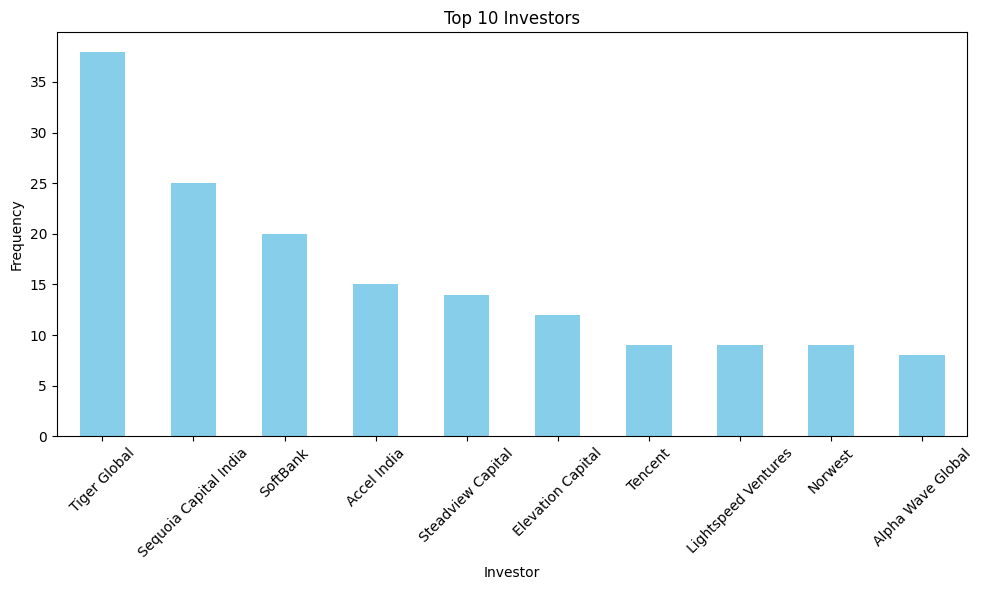

In [ ]:
investor_counts.head(10).plot(kind='bar',figsize=(10,6), color='skyblue')
plt.title('Top 10 Investors')
plt.xlabel('Investor')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

Tiger Global emerges as the most active investor, having backed 38 startups. Following that, Sequoia Capital India has invested in 25 companies, SoftBank in 20, and Accel India in 15. These firms are among the top venture capitalists driving the Indian unicorn ecosystem.

In [ ]:
display(HTML('''
<h2 style='background-color:green;color:white;padding:50px 10px;margin:10px;font-size:40px;text-align:center;'>Summary and Insights</h2>
'''))





Based on the analysis of the Indian Unicorn Startups 2023 dataset, here is a summary of key findings:

**Brief Summary:**

India's startup ecosystem is experiencing significant growth, solidifying its position as the third-largest home to unicorn startups globally. The analysis reveals key trends in funding, sector dominance, geographical distribution, company valuations, and investor participation.

**Strong Points of the Indian Startup Market:**

*   **Rapid Growth:** The increasing number of unicorns year-on-year indicates a robust and rapidly expanding startup landscape.
*   **Diverse Sectors:** While some sectors like E-commerce and EdTech are dominant, the presence of unicorns across various sectors (Fintech, SaaS, Healthtech, etc.) highlights the market's diversity and potential in multiple areas.
*   **Strong Investor Interest:** The high frequency of investments from major global and Indian venture capital firms like Tiger Global, Sequoia Capital India, and SoftBank demonstrates strong investor confidence in the Indian market.
*   **Emerging Hubs:** The concentration of unicorns in cities like Bangalore, Gurgaon, Mumbai, and Delhi signifies the development of strong startup ecosystems with access to talent, funding, and infrastructure.
*   **Fast Time to Unicorn Status:** Several companies achieving unicorn status in a relatively short period indicates a conducive environment for rapid scaling and innovation.

**Areas for Improvement (Potential Weak Points):**

*   **Geographical Concentration:** While certain cities are thriving, a more distributed growth across tier 2 and tier 3 cities could further boost the national ecosystem.
*   **Sustainability of Growth:** Analyzing the long-term sustainability of valuations and the path to profitability for these unicorns is crucial.
*   **Dependence on Specific Investors:** A high dependence on a few major investors might pose risks in terms of funding diversity and market stability.
*   **Data Granularity:** More detailed data on funding rounds, specific technologies, and founding teams could provide deeper insights.

**Detailed Insights:**

*   **Indian Startup Market Growth:** The year-wise funding trends show a significant increase in both the total amount funded and the number of unicorns, particularly in recent years, indicating a thriving and expanding market.
*   **Sector Growth:** E-commerce, EdTech, FoodTech, and FinTech (Payments & Wallet) are currently the most funded sectors, demonstrating strong market demand and investor focus in these areas. However, the analysis also shows emerging sectors with rapid growth.
*   **Valuable Companies and Growth:** Companies like Flipkart and BYJU'S, with high valuations and significant growth from their entry valuation, highlight the potential for substantial value creation in the Indian market. Their success can be attributed to factors like market size, innovation, and effective business models.
*   **Investors and Investor Activity:** The presence and high activity of prominent investors like Tiger Global and Sequoia Capital India underscore the attractiveness of the Indian market for global capital. Their investment patterns often shape the trends in the ecosystem.
*   **Location Analysis:** Bangalore remains the undisputed leader as a startup hub, attracting the most funding and housing the largest number of unicorns. Other cities like Gurgaon, Mumbai, and Delhi are also significant contributors, forming key clusters of innovation and investment.

This analysis provides a snapshot of the dynamic Indian unicorn landscape, highlighting its strengths and areas for potential development. Further analysis could delve deeper into specific sectors, the impact of market trends on valuations, and the long-term performance of these companies.